In [1]:
from ase.io import read, write
import numpy as np
from matplotlib import pyplot as plt
import ase
from mace.calculators.mace import MACECalculator
from matplotlib.cm import get_cmap
from matplotlib import rc
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from PIL import Image

In [2]:
def d1_d2(config=ase.Atoms, n=int, l=int, c=int):
    pos = config.get_positions()
    d1 = np.linalg.norm(pos[c,:] - pos[n,:])
    d2 = np.linalg.norm(pos[c,:] - pos[l,:])
    return d1, d2

/var/folders/c6/4ykf__mj12q0hn4ym6wyxhg40000gn/T/ipykernel_73335/3996127690.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')
/Users/domantas/miniconda3/envs/mace/lib/python3.11/site-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/Users/domantas/miniconda3/envs/mace/lib/python3.11/site-packages/torch/overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
/Users/domantas/miniconda3/envs/mace/lib/python3.11/site-packages/torch/overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
/Users/domantas/miniconda3/envs/mace/lib/python3.11/site-packages/torch/overrides.py:118:

Running committee mace with 2 models
using head Default out of ['Default']


/var/folders/c6/4ykf__mj12q0hn4ym6wyxhg40000gn/T/ipykernel_73335/3996127690.py:87: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter((d2-d1)[display_mp2], mp2_energies[display_mp2], c=cmap(cm[i]), marker='D',s=20, zorder=2, label=f'MP2 of iter {i}')


Running committee mace with 2 models
using head Default out of ['Default']


/var/folders/c6/4ykf__mj12q0hn4ym6wyxhg40000gn/T/ipykernel_73335/3996127690.py:94: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter((d2-d1)[display_mp2], mp2_energies[display_mp2], c=cmap(cm[i]), marker='D',s=16, zorder=2, label=f'MP2 of iter {i}')
/var/folders/c6/4ykf__mj12q0hn4ym6wyxhg40000gn/T/ipykernel_73335/3996127690.py:185: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


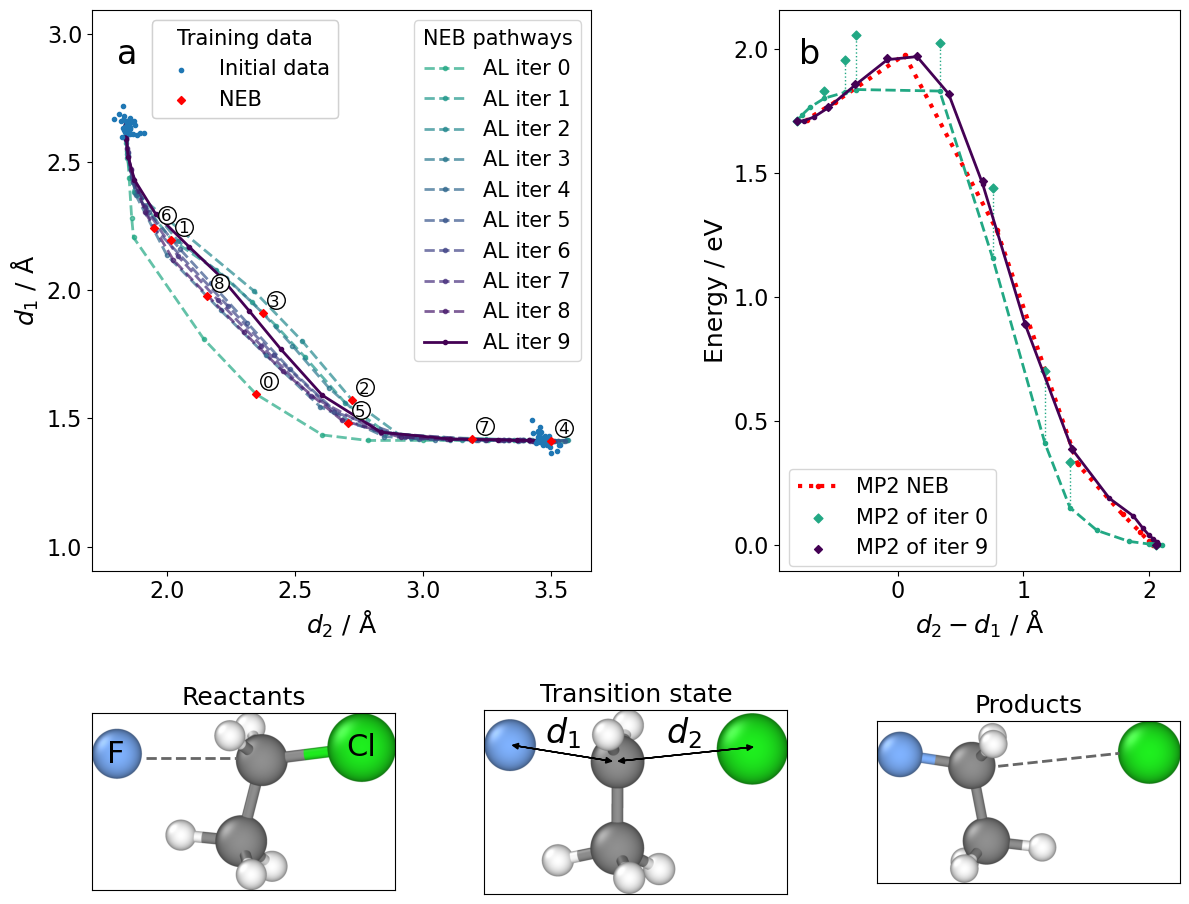

In [4]:
s = 12
m = 18
l = 14

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.title_fontsize'] = 15

fig = plt.figure(layout='constrained', figsize=(12,10))

gs = GridSpec(10, 12, figure=fig)

ax1 = fig.add_subplot(gs[0:6, 0:6])
ax2 = fig.add_subplot(gs[0:6, 7:])

ax3 = fig.add_subplot(gs[6:10, 0:4])
ax4 = fig.add_subplot(gs[6:10, 4:8])
ax5 = fig.add_subplot(gs[6:10, 8:])

for ax in [ax3, ax4, ax5]:
    ax.set_xticks([])
    ax.set_yticks([])

cmap = get_cmap('viridis')
cm = [i/15 for i in range(10)]
cm.reverse()

lines = []

#mp2_neb = np.array([at.get_potential_energy() for at in read('../ab-initio-neb/neb-mp2.xyz', '1:-1')])
mp2_neb = np.array([at.get_potential_energy() for at in read('../03_ethyl_cl_f_al/ab-initio-neb/11-images/neb-mp2.xyz', '1:-1')])
mp2_neb -= mp2_neb[0]
d1d2m = np.array([list(d1_d2(atoms,  n=3, l=4, c=0)) for atoms in read('../03_ethyl_cl_f_al/ab-initio-neb/11-images/neb-mp2.xyz', '1:-1')])
d1m = d1d2m[:,0]
d2m = d1d2m[:,1]
ax2.plot(d2m-d1m, mp2_neb, marker='.', linestyle='dotted', c='red', label='MP2 NEB', linewidth=3)

for i in [0,1,2,3,4,5,6,7,8,9]:
    neb = read(f'../03_ethyl_cl_f_al/iter{i}/neb.xyz', ':')

    d1d2 = np.array([list(d1_d2(atoms,  n=3, l=4, c=0)) for atoms in neb])
    d1 = d1d2[:,0]
    d2 = d1d2[:,1]
    ls = '-'
    alpha=1
    if i < 9:
        ls = '--'
        alpha=0.7
    
    line = ax1.plot(d2,d1, label=f'AL iter {i}', zorder=0, c=cmap(cm[i]), ls=ls, alpha=alpha, marker='.', linewidth=2)
    lines += line

for i in [0,9]:
    neb = read(f'../03_ethyl_cl_f_al/iter{i}/neb.xyz', ':')
    mace_energies = []
    calc = MACECalculator(model_paths=f'../03_ethyl_cl_f_al/iter{i}/MACE_*_swa.model', device='cpu', default_dtype='float64')
    for atoms in neb:
        atoms.calc = calc
        mace_energies.append(atoms.get_potential_energy())
    mace_energies = np.array(mace_energies)
    mace_energies -= np.min(mace_energies)

    d1d2 = np.array([list(d1_d2(atoms,  n=3, l=4, c=0)) for atoms in neb])
    d1 = d1d2[:,0]
    d2 = d1d2[:,1]
    ls = '-'
    alpha=1
    if i < 9:
        ls = '--'
        alpha=0.7
    
    #axs[0].scatter(d2,d1, zorder=0, c=cmap(cm[i]))
    if i == 9 or i == 0:

        ax2.plot((d2-d1), mace_energies, c=cmap(cm[i]), ls=ls, marker='.', zorder=2, linewidth=2)
    #axs[1].scatter((d2-d1), mace_energies, c=cmap(cm[i]), marker='.')

    if i == 0:
        mp2_energies = np.array([atoms.info['mp2_energy'] for atoms in read('../03_ethyl_cl_f_al/iter0/neb-mp2.xyz', ':')])
        mp2_energies -= np.min(mp2_energies)
        display_mp2 = [0, 9, 10, 11, 12, 13, 14, 15, 19]
        for it in display_mp2:
            ax2.plot([(d2-d1)[it]]*2, [mace_energies[it], mp2_energies[it]], c=cmap(cm[i]), linestyle='dotted', zorder=0, linewidth=1)
        ax2.scatter((d2-d1)[display_mp2], mp2_energies[display_mp2], c=cmap(cm[i]), marker='D',s=20, zorder=2, label=f'MP2 of iter {i}')
        

    if i == 9:
        display_mp2 = [0, 9, 10, 11, 12, 13, 14, 15, 16, 19]
        mp2_energies = np.array([atoms.info['mp2_energy'] for atoms in read('../03_ethyl_cl_f_al/iter9/neb-mp2.xyz', ':')])
        mp2_energies -= np.min(mp2_energies)
        ax2.scatter((d2-d1)[display_mp2], mp2_energies[display_mp2], c=cmap(cm[i]), marker='D',s=16, zorder=2, label=f'MP2 of iter {i}')



ax1.set_ylabel('$d_1\ /\ \mathrm{\AA}$')
ax1.set_xlabel('$d_2\ /\ \mathrm{\AA}$')
ax1.axis("equal")

ax2.set_ylabel('Energy / eV')
ax2.set_xlabel('$d_2 - d_1\ /\ \mathrm{\AA}$')

fname = "../03_ethyl_cl_f_al/iter9/train.xyz"
n_atom = 5
n_train = 60

configs = read(fname, ":")
initial = configs[n_atom : n_atom  + n_train]
neb_configs = configs[n_atom + n_train :]

d1i = []
d2i = []

for c in initial:
    d1, d2 = d1_d2(c, n=3, l=4, c=0)
    d1i.append(d1)
    d2i.append(d2)

d1n = []
d2n = []

for c in neb_configs:
    d1, d2 = d1_d2(c, n=3, l=4, c=0)
    d1n.append(d1)
    d2n.append(d2)

s1 = ax1.scatter(d2i, d1i, label="Initial data", marker=".")
s2 = ax1.scatter(d2n, d1n, label="NEB", marker="D", c='red', s=16)

#abinit_neb = read('../../ab-initio-neb/neb-mp2.xyz', ':')


for it, (xd, yd) in enumerate(zip(d2n, d1n)):
    ax1.scatter(xd+0.05, yd+0.05, marker='o', c='white', edgecolors='black', s=160)
    ax1.text(xd+0.025, yd+0.025, f'{it}', fontsize=12)


legend1 = ax1.legend(handles=lines, loc=1, title='NEB pathways')
ax1.add_artist(legend1)

legend2 = ax1.legend(handles=[s1,s2], loc='upper left', bbox_to_anchor=(0.1, 1.0), title='Training data')
#legend2 = axs[0].legend(handles=[s1], loc=2, title='Training data')
ax1.add_artist(legend2)

#axs[0].legend()

ax1.axis('equal')
ax1.set_ylabel('$d_1\ /\ \mathrm{\AA}$')
ax1.set_xlabel('$d_2\ /\ \mathrm{\AA}$')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.2))
ax1.set_yticks([1.0, 1.5, 2.0, 2.5, 3.0])
img = np.asarray(Image.open('../03_ethyl_cl_f_al/r.png'))
ax3.imshow(img)
ax3.set_title('Reactants')
ax3.text(0.05, 0.85, 'F', transform=ax3.transAxes, fontsize=22, verticalalignment='top', horizontalalignment='left')
ax3.text(0.84, 0.89, 'Cl', transform=ax3.transAxes, fontsize=22, verticalalignment='top', horizontalalignment='left')

ax4.arrow(80, 100, 280, 45, head_width=16, head_length=16, linewidth=1, color='black', length_includes_head=True)
ax4.arrow(360, 145, -280, -45, head_width=16, head_length=16, linewidth=1, color='black', length_includes_head=True)

ax4.arrow(380, 145, 380, -40, head_width=16, head_length=16, linewidth=1, color='black', length_includes_head=True)
ax4.arrow(760, 105, -380, 40, head_width=16, head_length=16, linewidth=1, color='black', length_includes_head=True)

ax3.plot([0.18, 0.48], [0.75, 0.75], transform=ax3.transAxes, linewidth=2, color='#666666', ls='--')
ax5.plot([0.4, 0.8], [0.72, 0.8], transform=ax5.transAxes, linewidth=2, color='#666666', ls='--')

ax4.text(0.2, 0.97, '$d_1$', transform=ax4.transAxes, fontsize=24, verticalalignment='top', horizontalalignment='left')
ax4.text(0.6, 0.97, '$d_2$', transform=ax4.transAxes, fontsize=24, verticalalignment='top', horizontalalignment='left')



img = np.asarray(Image.open('../03_ethyl_cl_f_al/ts.png'))
ax4.imshow(img)
ax4.set_title('Transition state')
img = np.asarray(Image.open('../03_ethyl_cl_f_al/p.png'))
ax5.imshow(img)
ax5.set_title('Products')


ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=24, verticalalignment='top', horizontalalignment='left')
ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=24, verticalalignment='top', horizontalalignment='left')

plt.tight_layout()


plt.savefig('gas-sn2.pdf')
plt.show()

In [6]:
neb = read('iter0/neb-mp2.xyz', '1:-1')
mp2 = np.array([at.info['mp2_energy'] for at in neb])
mace = np.array([at.get_potential_energy() for at in neb])
err = np.absolute(mace-mp2)

In [7]:
np.max(err)

0.29316634167844313

In [12]:
neb = read('iter9/neb-mp2.xyz', ':')
mp2 = np.array([at.info['mp2_energy'] for at in neb])
mace = np.array([at.get_potential_energy() for at in neb])
err = np.absolute(mace-mp2)

In [13]:
np.max(err)

0.011089711839304073

In [15]:
np.max(mp2) - mp2[-1]

0.2652671144242049

0.2605479523554095

In [9]:
mp2_neb

[-17372.331410478593,
 -17372.32876468796,
 -17372.3234543825,
 -17372.31457004208,
 -17372.302150881093,
 -17372.28888317023,
 -17372.26752197519,
 -17372.242979160485,
 -17372.207000980346,
 -17372.066798759734,
 -17371.434165362865,
 -17370.69985943245,
 -17370.373015622168,
 -17370.399809546536,
 -17370.53123088627,
 -17370.589797964192,
 -17370.612276388976,
 -17370.62137919013]

In [11]:
np.max(mp2_neb) - mp2_neb[-1]

0.26167874206294073